<img src="https://www.promocionachile.cl/img/logos/uai.JPG" width="400" alt="utfsm-logo" align="left"/>

# LEC de Probabilidad y Estadística, Viña del mar.
## Clase 06
### Profesor: Fabián Ramírez

# Objetivos:
* Estimación e intervalos de confianza.

## Introducción a las distribuciones que nacen de la normal
### Distribución Chi-Cuadrado

Sea $X_i\sim N(0,1)$,con $i=1,...,n$ independientes. Definamos:
$$
C = \sum_{i=1}^n X_i ^2
$$
Entonces diremos que $C$ sigue una distribución chi-cuadrado con $n$ grados de libertad y lo anotaremos como $C \sim \chi^2(n)$.

### Relación con la Gamma
La distribución $\chi^2$ es un caso especial de la distribución gamma. De hecho se tiene que:
$$
\chi^2(n) =^d = \Gamma \left( \dfrac{n}{2},\dfrac{1}{2} \right)
$$

### Aplicaciones
**Importante:** Suponga que $X_i$ es una muestra aleatoria de tamaño $n$ que viene desde una distribución normal de parámetros $\mu$ y $\sigma^2$. Entonces se tiene que:
$$
\bar{X} = \dfrac{1}{n}\sum_{i=1}^n X_i \sim N\left(\mu,\dfrac{\sigma^2}{n}\right)
$$
$$
\dfrac{(n-1)S^2}{\sigma^2} = \sum_{i=1}^n \left(\dfrac{X_i - \bar{X}}{\sigma}\right)^2 \sim \chi^2 (n-1)
$$
Puedes ver una demostración en el siguiente link https://online.stat.psu.edu/stat414/node/174/

### Simulaciones, probabilidades y cuantilies
Al igual como vimos en las clases anteriores podemos simular datos que vienen desde esta distribución, al igual que calcular cuantilies y probabilidades

[1] 0.6495148

[1] 10.006

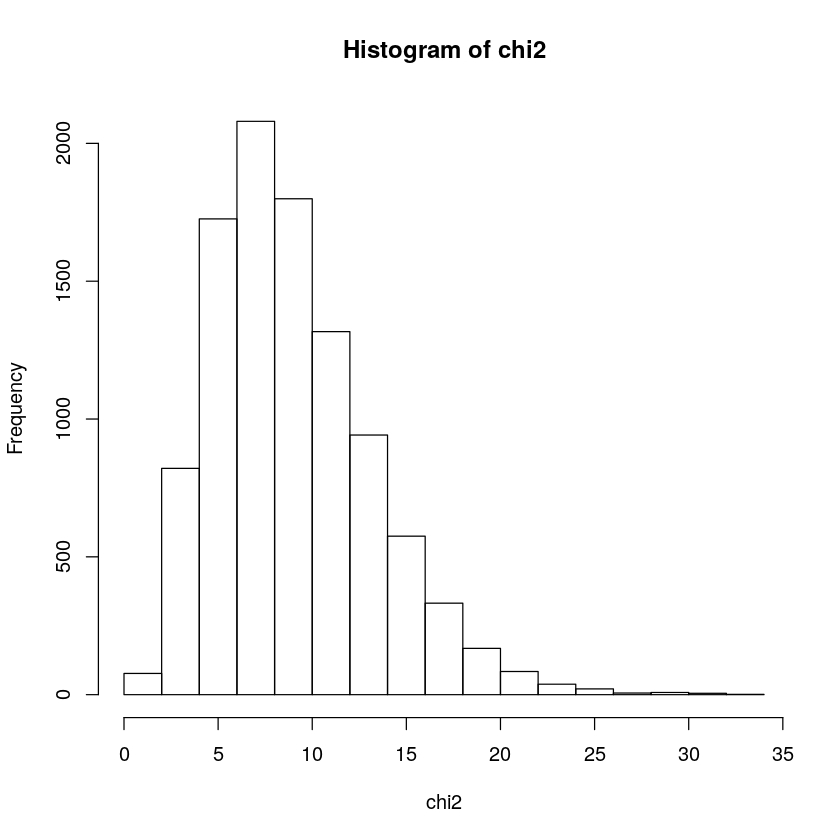

In [8]:
set.seed(0)
grados_de_libertad = 9
chi2=rchisq(10000,grados_de_libertad)
hist(chi2)
pchisq(10,grados_de_libertad)
qchisq(0.65,grados_de_libertad)

### Distribución t-Student
La distribución t de Student es la distribución de probabilidad del cociente
$$
    {\displaystyle T={\frac {Z}{\sqrt {V/\nu \ }}}=Z{\sqrt {\frac {\nu \ }{V}}}} 
$$
donde:
*    Z es una variable aleatoria distribuida según una normal típica (de media nula y varianza 1).
*    V es una variable continua que sigue una distribución $\chi^2$ con ${\displaystyle \nu  }$ grados de libertad.
*    Z y V son independientes
Y anotaremos que $T \sim t(\nu)$.

### Aplicaciones
Sea $X_1,...,X_n$ una muestra aleatoria de tamaño $n$ desde una normal de parámetros $\mu$ y $\sigma^2$. Entonces se tiene que:
$$
 \dfrac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}} \sim t(n-1)
$$
**NOTA** La distribución $t$ es simetrica con respecto al 0.

### Simulaciones, probabilidades y cuantiles
Nota que para simular la distribución t y calcular probabilidades se debe hacer lo siguiente:

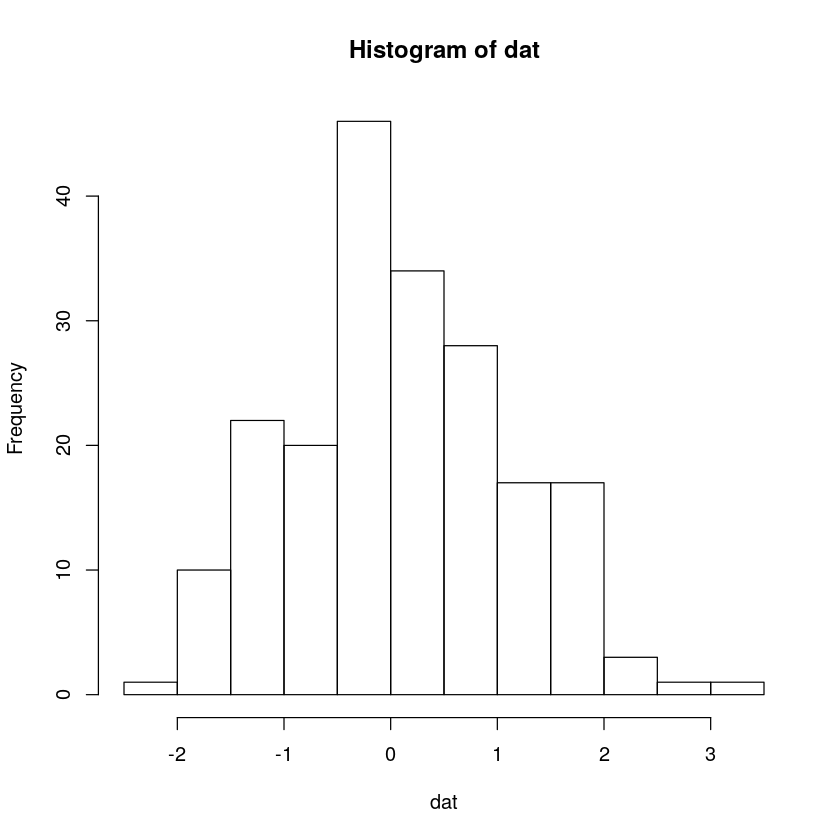

[1] 0.1596614

[1] -0.9985957

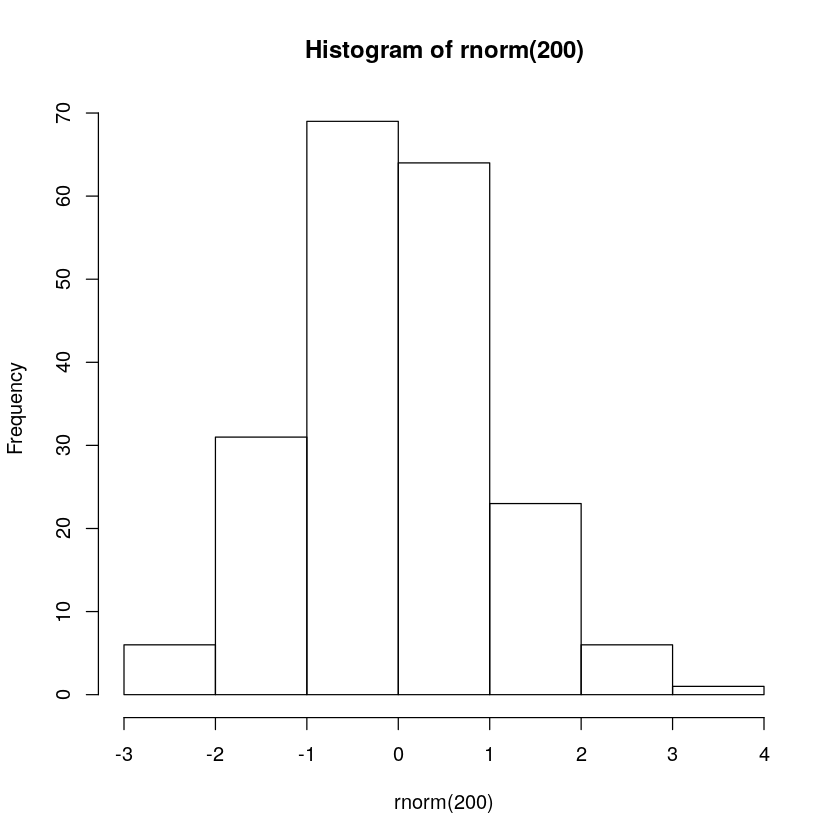

In [8]:
set.seed(0)
fd = 120
dat=rt(200,fd)
hist(dat)
hist(rnorm(200))
pt(-1,fd)
qt(0.16,fd)

## Estimación de parámetros de una distribución normal
Suponga que $X\sim N(\mu,\sigma^2)$ entonces nos gustaría estimar cuanto vale $\mu$. Para ello utilizaremos una aproximación de $\mu$ la cual sera el promedio muestral $\bar{X}$ de $n$ datos y anotaremos:
$$
\hat{\mu} = \bar{X}
$$
Además tenemos que:
$$
\hat{\mu} \sim N\left( \mu , \dfrac{\sigma^2}{n} \right)
$$
Por otro lado también nos gustaría poder estimar $\sigma^2$. Para ello aproximaremos $\sigma^2$ mediante la varianza muestral $S^2$ con $n$ datos y anotaremos:
$$
\hat{\sigma^2} = S^2
$$
Además se cumple que:
$$
(n-1)\dfrac{S^2}{\sigma^2} \sim \chi^2 (n-1)
$$
y
$$
\dfrac{ \bar{X} - \mu }{ \frac{S}{\sqrt{n}}} \sim t(n-1)
$$

_De aquí nota que tanto $\bar{X}$ y $S^2$ son variables aleatorias, por tanto es razonable hablar del concepto de probabilidad._

## Intervalos de confianza para $\mu$ y $\sigma ^2$
Supongamos la siguiente base de datos:

In [3]:
data=read.csv('data_clase_6.csv')

In [14]:
head(data)

,X,peso
,<int>,<dbl>
1,1,11.236992
2,2,13.092935
3,3,14.770178
4,4,8.183457
5,5,10.560417
6,6,11.756075


Me gustaría saber si es razonable pensar que la variable `peso` sigue una ley normal de parametros $\mu$ y $\sigma^2$ por estimar. Para ello notemos que:

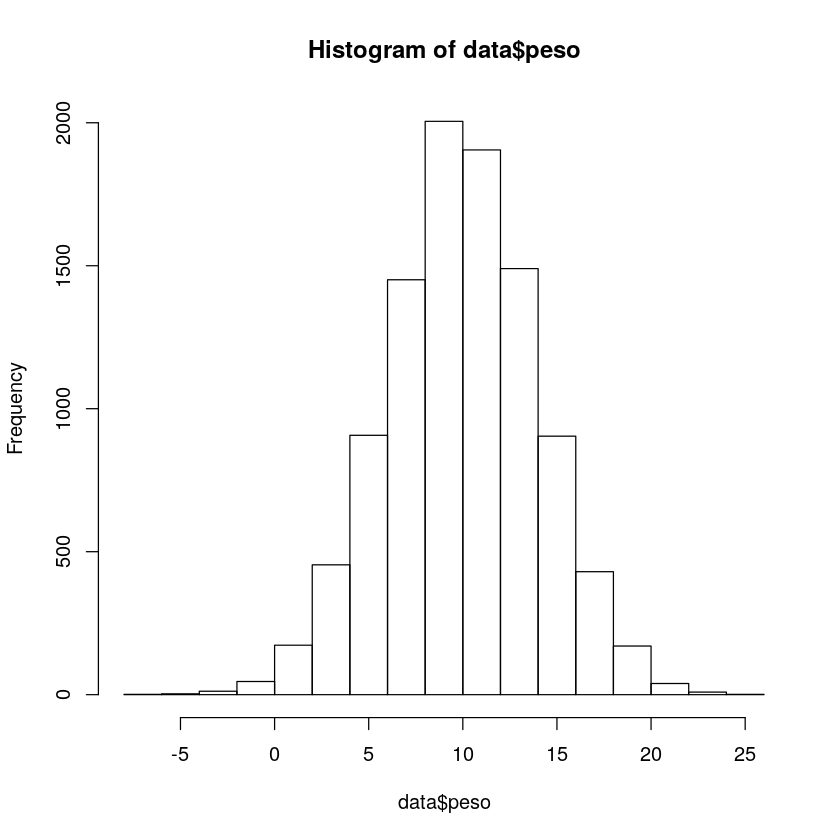

In [38]:
hist(data$peso)

Esto nos muestra que es bastante razonable pensar que los datos siguen una ley normal, puesto que es casi simetrica, pero no sabria decidir si es normal o t de student por tanto verificare la curtosis y el coeficiente de asimetria.

In [43]:
library(moments)

In [44]:
kurtosis(data$peso)

[1] 2.999678

In [45]:
skewness(data$peso)

[1] -0.02489265

Por tanto es razonable pensar que los datos son normales. Ahora bien necesito estimar los parámetros $\mu$ y $\sigma^2$ por tanto proponde los siguientes estimadores los cuales son los que vimos en esta clase:

In [46]:
barX = mean(data$peso)
S2 = var(data$peso)

In [48]:
barX
S2

[1] 9.966044

[1] 15.76626

Con eso obtenemos una estimación para la media y la varianza. Ahora nos lo que haremos sera construir un intervalo de confianza para la media y para la varianza.

**Formulario:**

Cuando $\mu$ es desconocido pero $\sigma^2$ es conocido se tiene que:
$$
IC_{\mu}: \bar{X} \pm \left|Z\left( \dfrac{1-\gamma}{2}\right)\right| \dfrac{\sigma}{\sqrt{n}}
$$
Cuando tanto $\mu$ como $\sigma^2$ son desconocidos se tiene que:
$$
IC_{\mu}: \bar{X} \pm \left|t\left( \dfrac{1-\gamma}{2} ; n-1 \right)\right| \dfrac{S}{\sqrt{n}}
$$
y
$$
IC_{\sigma^2}: \left[\frac{(n-1) s^{2}}{\chi^{2}\left(\frac{1-\gamma}{2}+\gamma \right)} ; \frac{(n-1) s^{2}}{\chi^{2}\left(\frac{1-\gamma}{2}\right)}\right]
$$

Donde $\gamma$ es el nivel de confianza. 

### IC para $\mu$ con $\sigma^2$ desconocido con la base de datos.
Procedemos a encontrar un IC para $\mu$ y $\sigma$ con una confianza $\gamma$.

In [74]:
# defino
n = length(data$peso)
gamma = 0.95 #nivel de confianza

In [75]:
LS_mu =barX + abs(qt((1-0.95)/2,n-1))*sqrt(S2)/sqrt(n)
LI_mu =barX - abs(qt((1-0.95)/2,n-1))*sqrt(S2)/sqrt(n)

Por tanto el intervalo de confianza viene dado por

In [76]:
paste('[',LI_mu,';',LS_mu,']')

[1] "[ 9.88821093573586 ; 10.0438773705317 ]"

Existe una función en R realiza el intervalo de confianza para la media cuando la varianza es desconocida.

In [77]:
t.test(data$peso,conf.level = 0.95)


	One Sample t-test

data:  data$peso
t = 250.99, df = 9999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  9.888211 10.043877
sample estimates:
mean of x 
 9.966044 


### IC para $\sigma^2$ con la base de datos.


In [82]:
LI_mu = (n-1)*S2 / qchisq( (1-gamma)/2 + gamma,n-1)
LS_mu =  (n-1)*S2 / qchisq( (1-gamma)/2,n

In [83]:
paste('[',LI_mu,';',LS_mu,']')

[1] "[ 15.3381934938467 ; 16.2125830635943 ]"

No existe una función en el R que te entrega directamente este IC, pero se puede utilizar un paquete

In [84]:
if (!require('devtools')) install.packages('devtools')
devtools::install_github('fhernanb/stests', force=TRUE)

Loading required package: devtools

Loading required package: usethis




expm (NA -> 0.999-4) [CRAN]


Installing 1 packages: expm

Installing package into ‘/home/fabimath/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpR3OK3C/remotes13f7711b27f/fhernanb-stests-356a5af/DESCRIPTION’ (341ms)
─  preparing ‘stests’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘stests_0.1.0.tar.gz’
   


Installing package into ‘/home/fabimath/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [11]:
library(stests)


Attaching package: ‘stests’


The following object is masked from ‘package:stats’:

    var.test




In [1]:
var.test(data$peso)

ERROR: Error in data$peso: object of type 'closure' is not subsettable


Proxima clase. Mas intervalos de confianza y test de hipótesis.

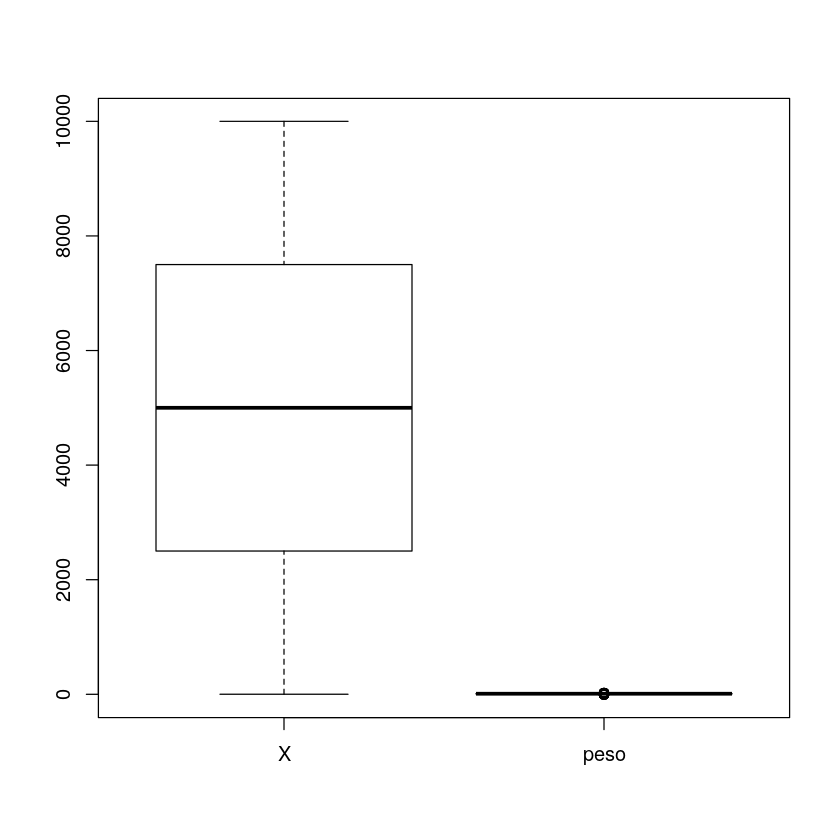

In [4]:
boxplot(data)